In [1]:
# !pip install gradio

In [74]:
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import keras
import cv2
import gradio as gr

In [2]:
data_dir="C:\\Users\\acer\\Desktop\\sponsorship letter\\Training"

In [3]:
import pathlib

In [4]:
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2475


In [5]:
giloma=list(data_dir.glob('giloma/*'))

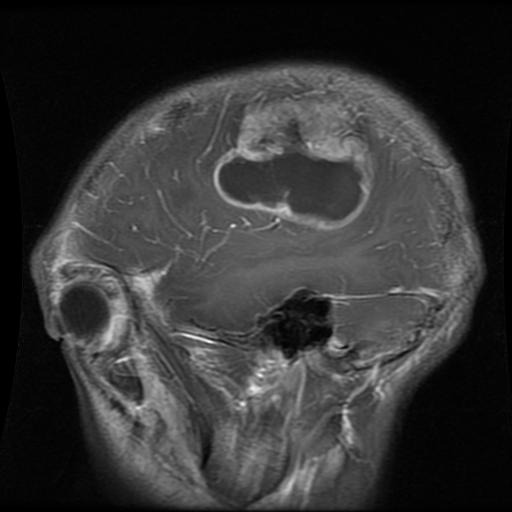

In [6]:
PIL.Image.open(str(giloma[10]))

In [7]:
meningioma=list(data_dir.glob('meningioma/*'))

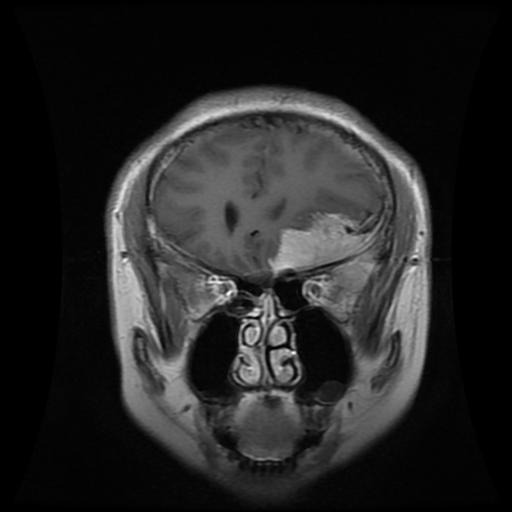

In [8]:
PIL.Image.open(str(meningioma[0]))

In [9]:
pituitary=list(data_dir.glob('pituitary/*'))

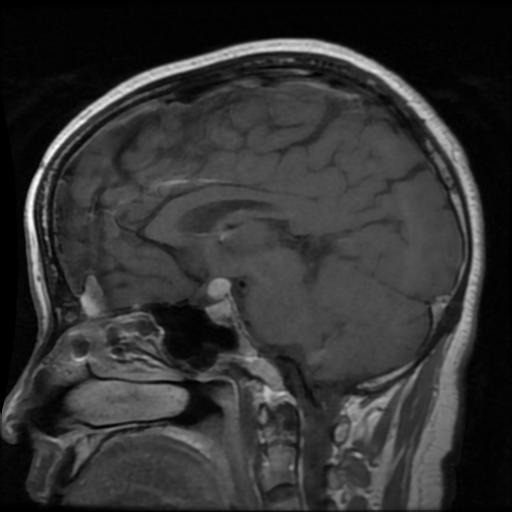

In [10]:
PIL.Image.open(str(pituitary[50]))

In [11]:
cv2.imread(str(pituitary[50])).shape

(512, 512, 3)

In [12]:
images_dict={
    "giloma":list(data_dir.glob('giloma/*')),
    "meningioma":list(data_dir.glob('meningioma/*')),
    "pituitary":list(data_dir.glob('pituitary/*'))
}

In [13]:
images_label={
    "giloma":0,
    "meningioma":1,
    "pituitary":2
}

In [14]:
X,y=[],[]
for tumor,images in images_dict.items():
    for image in images:
        image=cv2.imread(str(image))
        image_resize=cv2.resize(image,(180,180))
        X.append(image_resize)
        y.append(images_label[tumor])
    
    

In [15]:
X=np.array(X)
y=np.array(y)

In [16]:
X=X.astype('float32')
# y=y.astype('float32')

In [17]:
import sklearn

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.dtype

dtype('float32')

In [20]:
len(X_train)

1980

In [21]:
data_agumentation=keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
#     tf.keras.layers.experimental.preprocessing.RandomFlip(,input_shape=(180,180,3))
])

In [22]:
model1=keras.Sequential([
    data_agumentation,
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
#     tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.Conv2D(16,3,activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(3,activation="softmax")
])
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
62/62 [==============================] - 33s 48ms/step - loss: 46.0824 - accuracy: 0.4171
Epoch 2/100
62/62 [==============================] - 2s 37ms/step - loss: 0.8804 - accuracy: 0.5681
Epoch 3/100
62/62 [==============================] - 2s 37ms/step - loss: 0.8324 - accuracy: 0.5941
Epoch 4/100
62/62 [==============================] - 2s 38ms/step - loss: 0.8248 - accuracy: 0.6026
Epoch 5/100
62/62 [==============================] - 2s 37ms/step - loss: 0.7668 - accuracy: 0.6482
Epoch 6/100
62/62 [==============================] - 2s 37ms/step - loss: 0.7247 - accuracy: 0.6773
Epoch 7/100
62/62 [==============================] - 2s 37ms/step - loss: 0.6948 - accuracy: 0.6731
Epoch 8/100
62/62 [==============================] - 2s 38ms/step - loss: 0.6768 - accuracy: 0.6985
Epoch 9/100
62/62 [==============================] - 2s 37ms/step - loss: 0.6907 - accuracy: 0.6876
Epoch 10/100
62/62 [==============================] - 2s 37ms/step - loss: 0.6568 - accuracy: 0.69

In [23]:
model1.evaluate(X_test,y_test)

16/16 [==============================] - 1s 29ms/step - loss: 0.3391 - accuracy: 0.9111


[0.3390871286392212, 0.9111111164093018]

In [40]:
pred=model1.predict(X_test)

In [41]:
pred=[np.argmax(i) for i in pred]

In [42]:
pred[15:20]

[1, 2, 0, 1, 1]

In [43]:
y_test[15:20]

array([1, 2, 0, 0, 1])

In [44]:
def predict(predict,index):
    if predict[index]==0:
        return "giloma"
    elif predict[index]==1:
        return "meningioma"
    else:
        return "pituitary"

In [2]:
# image = gr.inputs.Image(shape=(180,180))

In [3]:
# label = gr.outputs.Label(num_top_classes=3)

In [4]:
# gr.Interface(predict, inputs=image, outputs=label,interpretation='default').launch(debug='True')

In [45]:
for i in range(0,10):
    print(predict(pred,i))

giloma
pituitary
giloma
pituitary
pituitary
pituitary
meningioma
pituitary
meningioma
giloma


In [46]:
def true(y_test,index):
    if y_test[index]==0:
        return "giloma"
    elif y_test[index]==1:
        return "meningioma"
    else:
        return "pituitary"
    

In [47]:
for i in range(0,10):
    print(true(y_test,i))

giloma
pituitary
giloma
pituitary
pituitary
pituitary
meningioma
pituitary
giloma
giloma


In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       162
           1       0.84      0.91      0.87       155
           2       0.95      0.98      0.96       178

    accuracy                           0.91       495
   macro avg       0.91      0.91      0.91       495
weighted avg       0.91      0.91      0.91       495



In [50]:
cm=confusion_matrix(y_test,pred)

Text(69.0, 0.5, 'Predicted')

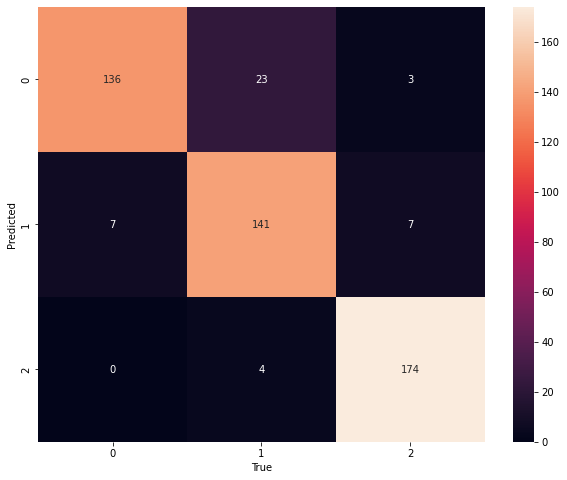

In [51]:
import matplotlib.pyplot as plt
import seaborn as sm
plt.figure(figsize=(10,8))
sm.heatmap(cm,annot=True,fmt="d")
plt.xlabel("True")
plt.ylabel("Predicted")

In [52]:
len(giloma)

826

In [53]:
len(meningioma)

822

In [54]:
len(pituitary)

827

<BarContainer object of 2 artists>

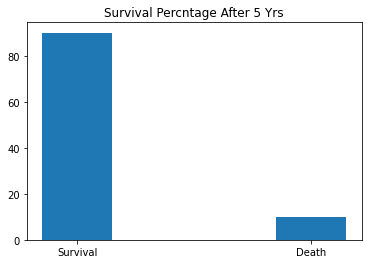

In [55]:
plt.title("Survival Percntage After 5 Yrs")
plt.bar(["Survival","Death"],[90,10],width=0.3)

In [62]:
tumor={
    0:{"giloma":79,
            "meningioma":78,
            "pitutary":10},
    1:{"giloma":60,
            "meningioma":71,
            "pitutary":20},
    2:{"giloma":60,
            "meningioma":71,
            "pitutary":20}
}

In [67]:
label={
    0:"giloma",
    1:"meningioma",
    2:"pitutary"
}

In [68]:
def plotting(age,label_of_tumor):
    if age<=22 and age>=44:
        plt.bar(["Survival Rate","No"],[tumor[0][label[0]],100-tumor[0][label[label_of_tumor]]],width=0.3)  
    elif age<=45 and age>=55:
        plt.bar(["Survival Rate","No"],[tumor[1][label[0]],100-tumor[1][label[label_of_tumor]]],width=0.3) 
    else:
        plt.bar(["Survival Rate","No"],[tumor[2][label[0]],100-tumor[1][label[label_of_tumor]]],width=0.3)

Prediction Rate of Survival After 5years.

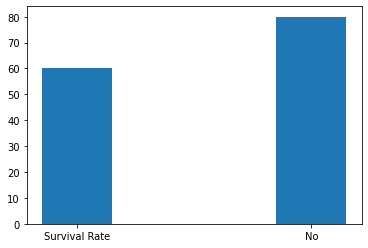

In [69]:
plotting(25,pred[10])